In [1]:
import pandas as pd

In [8]:
# read events

df_non_attended_events = pd.read_csv('..\\..\\data_CityEvent\\Cityevents\\Demand_Intelligence_for_Non_Attended_Events_California-0.csv')

display(df_non_attended_events.head())

,EVENT_ID,CREATE_DT,UPDATE_DT,TITLE,CATEGORY,LABELS,DESCRIPTION,EVENT_START,EVENT_END,PREDICTED_END,...,STATUS,BRAND_SAFE,PARENT_EVENT_ID,CANCELLED_DT,POSTPONED_DT,PREDICTED_EVENT_SPEND_ACCOMMODATION,PREDICTED_EVENT_SPEND_HOSPITALITY,PREDICTED_EVENT_SPEND_TRANSPORTATION,ROW_INSERTED_DT,ROW_UPDATED_DT
0,CgRQ2KdXw8A3bMV8Nb,2020-08-27 22:55:22.281,2022-11-21 02:16:05.558,Spring Session,academic,"[""academic"",""academic-session"",""online-session""]",NaN,2021-02-01 08:00:00.000,2021-05-29 06:59:59.999,NaN,...,active,True,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21 04:54:20.629 Z,2023-01-31 20:57:26.060 Z
1,HCBz6Cq597uErCEhjk,2022-06-28 04:02:14.480,2022-10-31 02:33:00.989,Fall Exams,academic,"[""academic"",""exam""]",NaN,2022-12-12 08:00:00.000,2022-12-17 07:59:59.999,NaN,...,active,True,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21 04:54:20.629 Z,2023-01-31 20:57:26.060 Z
2,8suPhiirmZmpD7drSY,2021-08-13 04:55:02.373,2023-04-03 15:47:30.312,North Monterey County Unified School District ...,school-holidays,"[""christmas-holiday"",""holiday"",""school""]",NaN,2021-12-18 00:00:00.000,2022-01-09 23:59:59.999,NaN,...,active,True,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21 04:54:20.629 Z,2023-04-04 04:21:39.350 Z
3,HVCAsME5xnv9eFpkpF,2022-08-23 13:29:24.268,2023-04-03 17:27:43.721,San Lucas Union Elementary School District - T...,school-holidays,"[""holiday"",""school"",""thanksgiving-holiday""]",NaN,2022-11-19 00:00:00.000,2022-11-27 23:59:59.999,NaN,...,active,True,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21 04:54:20.629 Z,2023-04-04 07:44:46.127 Z
4,49R5zWo3aTHUTvJ2Kr,2021-10-12 12:47:41.736,2023-04-03 16:32:11.924,Tamalpais Union High School District - Summer ...,school-holidays,"[""holiday"",""school"",""summer-holiday""]",NaN,2021-06-11 00:00:00.000,2021-08-17 23:59:59.999,NaN,...,active,True,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21 04:54:20.629 Z,2023-04-04 07:44:46.127 Z


In [10]:
print(df_non_attended_events.shape)

(20070, 32)


In [12]:
# see all the columns
cols = []
for col in df_non_attended_events.columns:
    cols.append(col)

print(cols)

['EVENT_ID', 'CREATE_DT', 'UPDATE_DT', 'TITLE', 'CATEGORY', 'LABELS', 'DESCRIPTION', 'EVENT_START', 'EVENT_END', 'PREDICTED_END', 'TIMEZONE', 'ENTITIES', 'GEO', 'IMPACT_PATTERNS', 'SCOPE', 'PLACEKEY', 'COUNTRY_CODE', 'PLACE_HIERARCHIES', 'PHQ_ATTENDANCE', 'PHQ_RANK', 'LOCAL_RANK', 'AVIATION_RANK', 'STATUS', 'BRAND_SAFE', 'PARENT_EVENT_ID', 'CANCELLED_DT', 'POSTPONED_DT', 'PREDICTED_EVENT_SPEND_ACCOMMODATION', 'PREDICTED_EVENT_SPEND_HOSPITALITY', 'PREDICTED_EVENT_SPEND_TRANSPORTATION', 'ROW_INSERTED_DT', 'ROW_UPDATED_DT']


In [13]:
# CATEGORY
print(df_non_attended_events['CATEGORY'].unique())
print(len(df_non_attended_events['CATEGORY'].unique()))
print(df_non_attended_events['CATEGORY'].value_counts())

['academic' 'school-holidays' 'observances' 'public-holidays' 'politics'
 'daylight-savings']
6
CATEGORY
school-holidays     13057
academic             5623
observances          1282
public-holidays        96
politics                6
daylight-savings        6
Name: count, dtype: int64


In [14]:
# LABELS
print(df_non_attended_events['LABELS'].unique())
print(len(df_non_attended_events['LABELS'].unique()))
print(df_non_attended_events['LABELS'].value_counts())

['["academic","academic-session","online-session"]' '["academic","exam"]'
 '["christmas-holiday","holiday","school"]'
 '["holiday","school","thanksgiving-holiday"]'
 '["holiday","school","summer-holiday"]'
 '["academic","academic-session","estimated"]' '["holiday","observance"]'
 '["holiday","observance","observance-united-nations"]'
 '["holiday","observance","observance-season"]'
 '["academic","academic-session"]' '["holiday","school","winter-holiday"]'
 '["academic","holiday"]' '["academic","graduation"]'
 '["academic","estimated","holiday"]'
 '["academic","academic-session","in-person-session"]'
 '["holiday","school","spring-holiday"]' '["holiday","school"]'
 '["easter-holiday","holiday","school"]' '["holiday","holiday-national"]'
 '["autumn-holiday","holiday","school"]'
 '["academic","academic-session","estimated","in-person-session"]'
 '["academic","exam","in-person-session"]'
 '["academic","exam","online-session"]'
 '["holiday","holiday-orthodox","holiday-religious","observance"]

In [15]:
# convert to list for labels column from string
import ast
df_non_attended_events['LABELS'] = df_non_attended_events['LABELS'].apply(ast.literal_eval)

labels_count = {}
for label in df_non_attended_events['LABELS']:
    for label_child in label:
        if label_child in labels_count:
            labels_count[label_child] += 1
        else:
            labels_count[label_child] = 1

display(labels_count)
print(len(labels_count))

{'academic': 5623,
 'academic-session': 1863,
 'online-session': 668,
 'exam': 853,
 'christmas-holiday': 2547,
 'holiday': 16663,
 'school': 13057,
 'thanksgiving-holiday': 2546,
 'summer-holiday': 3146,
 'estimated': 857,
 'observance': 1282,
 'observance-united-nations': 605,
 'observance-season': 14,
 'winter-holiday': 1383,
 'graduation': 640,
 'in-person-session': 478,
 'spring-holiday': 2547,
 'easter-holiday': 102,
 'holiday-national': 46,
 'autumn-holiday': 657,
 'holiday-orthodox': 18,
 'holiday-religious': 227,
 'observance-worldwide': 130,
 'hybrid-session': 193,
 'holiday-hebrew': 65,
 'social': 39,
 'holiday-local': 50,
 'holiday-hindu': 29,
 'holiday-christian': 85,
 'holiday-observed': 14,
 'election': 5,
 'parliament': 5,
 'politics': 6,
 'holiday-muslim': 30,
 'observance-local': 13,
 'daylight-savings': 6,
 'referendum': 1}

37


In [16]:
# DESCRIPTION
for i in range(0,10):
    print(df_non_attended_events['DESCRIPTION'][i])
    print(type(df_non_attended_events['DESCRIPTION'][i]))
    print('///')

nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///
nan
<class 'float'>
///


In [17]:
print(df_non_attended_events['TIMEZONE'].value_counts())

TIMEZONE
America/Los_Angeles    5623
America/Chicago           6
Name: count, dtype: int64


In [19]:
# ENTITIES
# GEO
# IMPACT_PATTERNS
# SCOPE

for i in range(0,3):
    print('ENTITIES')
    print(df_non_attended_events['ENTITIES'][i])
    print('GEO')
    print(df_non_attended_events['GEO'][i])
    print('IMPACT_PATTERNS')
    print(df_non_attended_events['IMPACT_PATTERNS'][i])
    print('SCOPE')
    print(df_non_attended_events['SCOPE'][i])

ENTITIES
[{"entity_id":"UkfpB6FpikmAcYRrBkH6Js","formatted_address":"7250 Mesa College Drive\nSan Diego, CA 92111\nUnited States of America","name":"San Diego Mesa College","type":"venue"}]
GEO
{"coordinates":[-117.1635759,32.8039378],"type":"Point"}
IMPACT_PATTERNS
nan
SCOPE
locality
ENTITIES
[{"entity_id":"c5Ha6PmYxGY8fZxQLRHCuR","formatted_address":"16130 Lasselle Street\nMoreno Valley, CA 92551\nUnited States of America","name":"Moreno Valley College","type":"venue"}]
GEO
{"coordinates":[-117.203114,33.887259],"type":"Point"}
IMPACT_PATTERNS
nan
SCOPE
locality
ENTITIES
nan
GEO
{"coordinates":[[[[-121.62471099999999,36.81248400000004],[-121.623059,36.81543700000004],[-121.61882,36.815735000000004],[-121.61954600000003,36.822429],[-121.63046299999993,36.82139900000004],[-121.62817499999998,36.82653200000002],[-121.63022199999999,36.83403399999999],[-121.63884899999995,36.82981800000003],[-121.64227899999999,36.83820900000002],[-121.65017099999999,36.83434399999997],[-121.669664,36.83

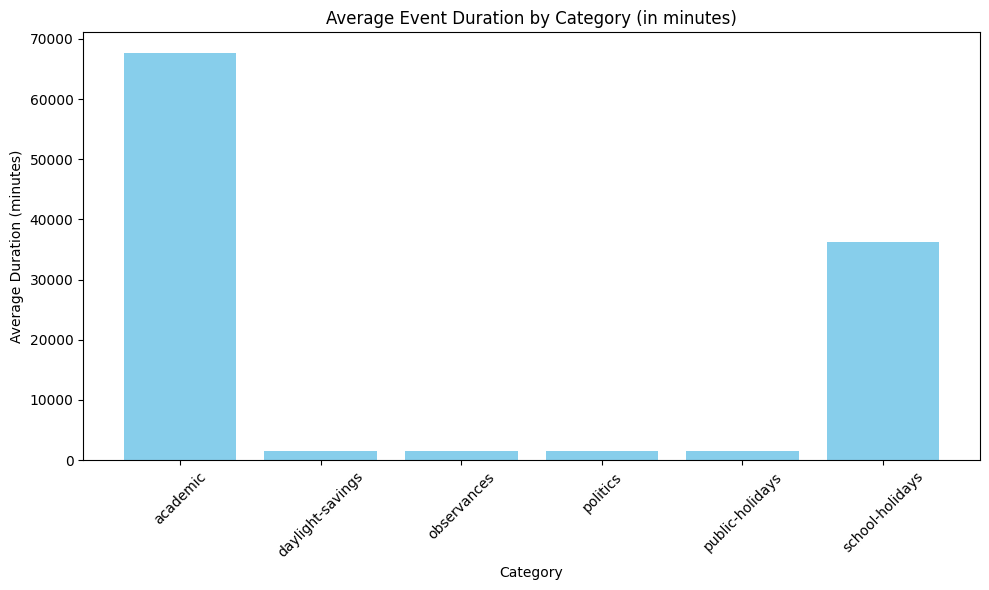

In [20]:
# Time distriubtion
import matplotlib.pyplot as plt

# Convert EVENT_START and EVENT_END to datetime
df_non_attended_events['EVENT_START'] = pd.to_datetime(df_non_attended_events['EVENT_START'])
df_non_attended_events['EVENT_END'] = pd.to_datetime(df_non_attended_events['EVENT_END'])

# Calculate duration in minutes
df_non_attended_events['DURATION'] = (df_non_attended_events['EVENT_END'] - df_non_attended_events['EVENT_START']).dt.total_seconds() / 60

# Group by CATEGORY and calculate mean duration
grouped = df_non_attended_events.groupby('CATEGORY')['DURATION'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped['CATEGORY'], grouped['DURATION'], color='skyblue')
plt.title('Average Event Duration by Category (in minutes)')
plt.xlabel('Category')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

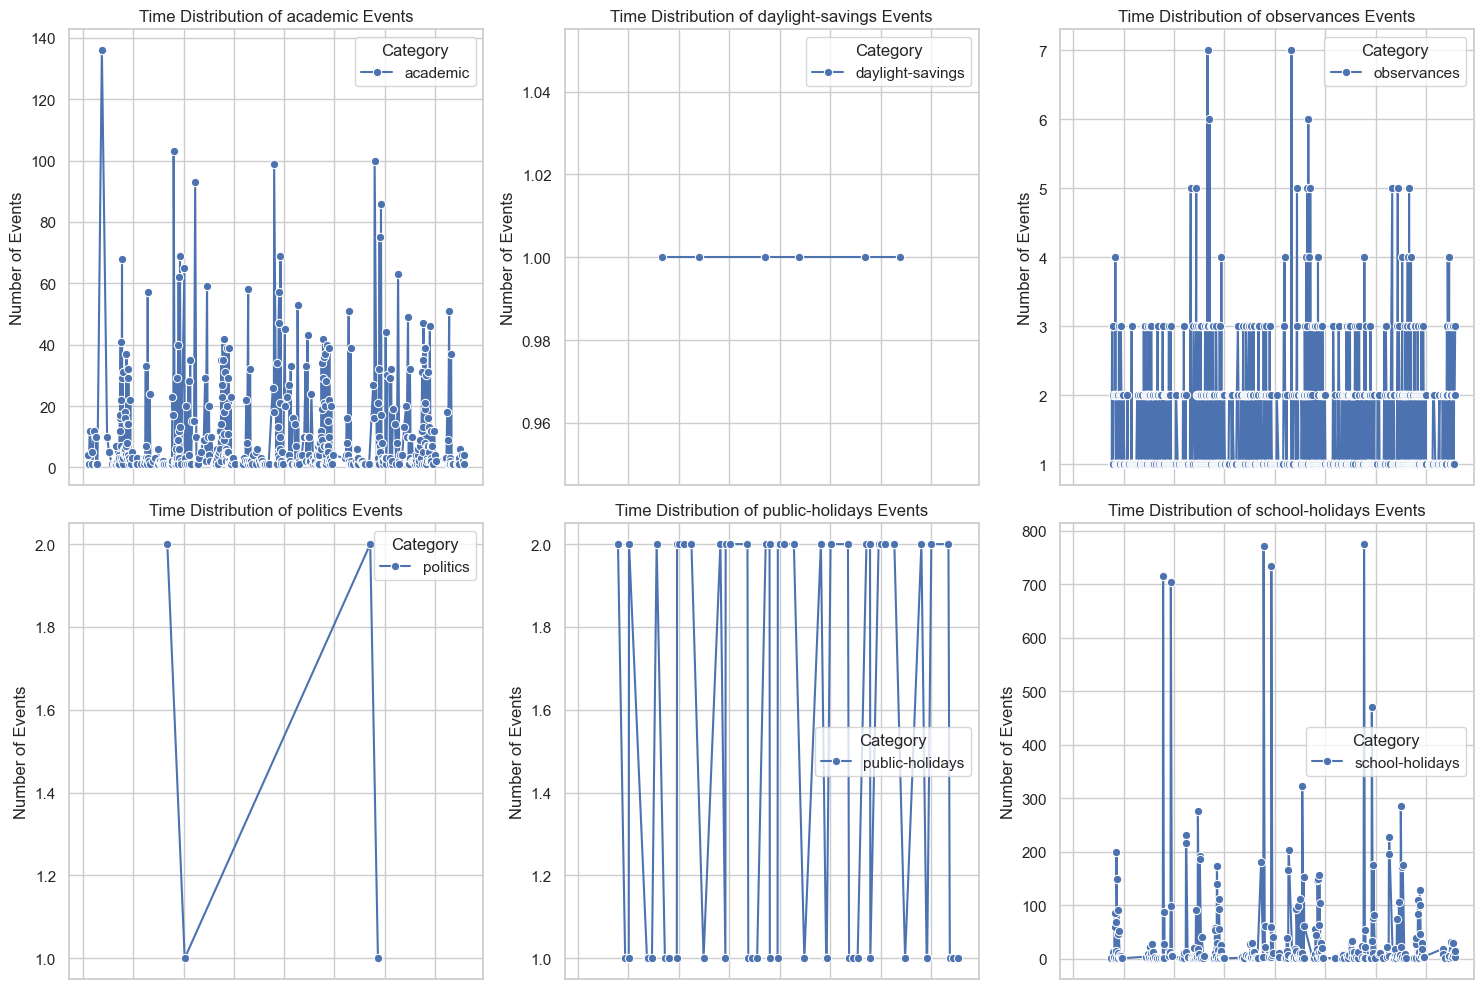

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the EVENT_START column to datetime
df_non_attended_events['EVENT_START'] = pd.to_datetime(df_non_attended_events['EVENT_START'])

# Create a new DataFrame to count events per category and start date
df_time_distribution = df_non_attended_events.groupby(['CATEGORY', df_non_attended_events['EVENT_START'].dt.date]).size().reset_index(name='EVENT_COUNT')

# Get unique categories for subplots
categories = df_time_distribution['CATEGORY'].unique()

# Set up 3x3 subplots
n_categories = len(categories)
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

sns.set(style="whitegrid")

# Loop through each category to create a subplot
for ax, category in zip(axes, categories):
    # Filter data for the current category
    category_data = df_time_distribution[df_time_distribution['CATEGORY'] == category]
    
    # Plot a line for the current category
    sns.lineplot(data=category_data, x='EVENT_START', y='EVENT_COUNT', ax=ax, marker='o', label=category)
    
    # Set title and labels
    ax.set_title(f'Time Distribution of {category} Events')
    ax.set_ylabel('Number of Events')
    ax.legend(title='Category')

# Set common x-axis label
plt.xlabel('Event Start Date')
plt.xticks(rotation=45)

# Hide any unused subplots if there are fewer than 9 categories
for i in range(n_categories, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
